In [648]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


In [649]:
df = pd.read_csv('./vendas2024.csv')

# Criando a tabela pivot para somar a quantidade pedida de cada grupo por cliente
pivot_table = pd.pivot_table(df, 
                             values='QTDE_PEDIDA', 
                             index='id_cliente', 
                             columns='DS_GRUPO', 
                             aggfunc='sum', 
                             fill_value=0)
# Resetando o índice
pivot_table_reset = pivot_table.reset_index()
pivot_table_reset


DS_GRUPO,id_cliente,ALIMENTOS,BELEZA,CAPILAR,CURATIVOS,DESCOLORANTE,DESODORANTES,ESMALTES,FRALDAS GERIATRICA,FRALDAS INFANTIL,...,INFANTIL,LAMINAS,LIMPEZA,MANICUROS / PEDICUROS,PERF TRIB,PILHAS E BATERIAS,PREPAROS BARBEAR,PRESERVATIVOS,SOLAR,TINTURAS
0,16,0.0,0.0,0.0,0.0,0.0,66.0,0.0,0.0,6.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,12.0
1,47,5.0,6.0,9.0,26.0,0.0,85.0,0.0,8.0,0.0,...,0.0,0.0,0.0,16.0,0.0,0.0,0.0,0.0,0.0,22.0
2,75,172.0,499.0,1357.0,196.0,40.0,2276.0,3.0,4.0,598.0,...,476.0,344.0,137.0,315.0,6.0,101.0,12.0,178.0,26.0,2001.0
3,126,0.0,4.0,13.0,0.0,2.0,0.0,0.0,0.0,0.0,...,0.0,6.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
4,265,3.0,13.0,20.0,5.0,0.0,84.0,0.0,0.0,12.0,...,20.0,20.0,0.0,17.0,0.0,0.0,0.0,22.0,0.0,16.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3925,55867,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,...,6.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0
3926,55868,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,144.0
3927,55870,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
3928,55873,0.0,9.0,24.0,0.0,0.0,53.0,0.0,0.0,9.0,...,0.0,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,45.0


# Plotando boxplots para visualizar os outliers

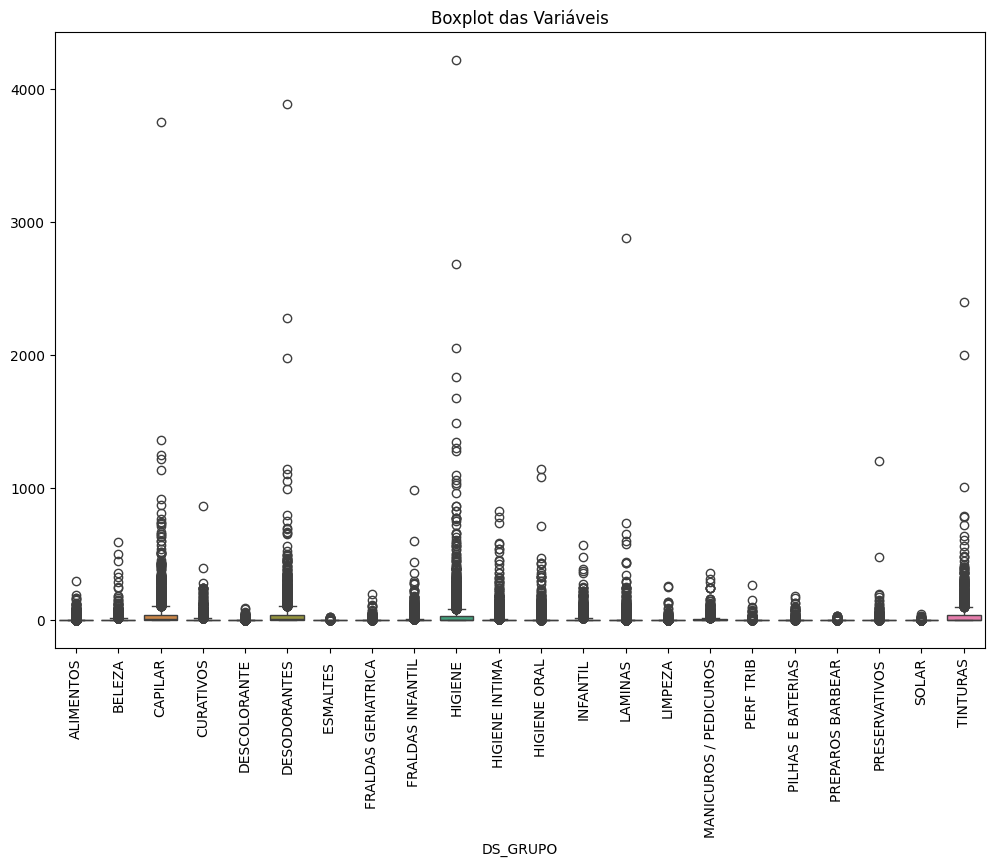

In [650]:

plt.figure(figsize=(12, 8))
sns.boxplot(data=pivot_table_reset.drop(columns=['id_cliente']))
plt.title('Boxplot das Variáveis')
plt.xticks(rotation=90)
plt.show()

Plotando os dados de media de quantidade pedida dos grupos

<Axes: xlabel='DS_GRUPO'>

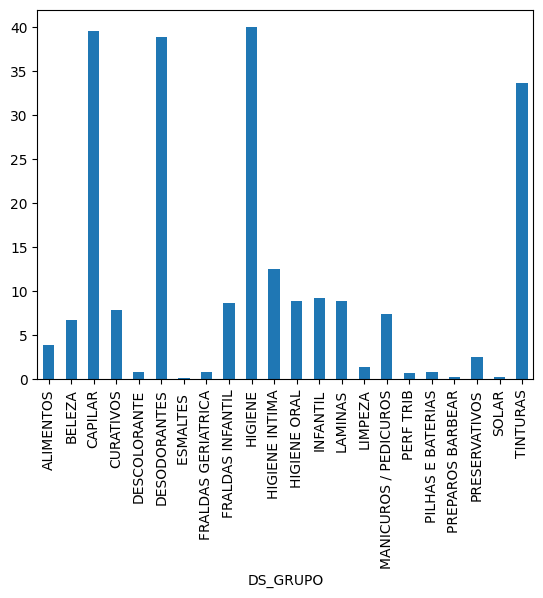

In [651]:
pivot_table_reset.drop(columns='id_cliente').mean().plot.bar()

# Removendo outliers
Mudando valor do outlier para o limite maximo

In [652]:
#valor_corte_outlier = 50

#pivot_table_reset = pivot_table_reset.clip(upper=100)
#pivot_table = pivot_table.clip(upper=100)

# Função para substituir outliers pela média da coluna
def replace_outliers_with_mean(column):
    Q1 = column.quantile(0.25)
    Q3 = column.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    mean_value = column.mean()

    return column.apply(lambda x: upper_bound if x < lower_bound or x > upper_bound else x)

# Aplicando a função a cada coluna do DataFrame, exceto 'id_cliente'
for col in pivot_table_reset.columns:
    if col != 'id_cliente':
        pivot_table_reset[col] = replace_outliers_with_mean(pivot_table_reset[col])


In [653]:
def clip_values_except_id(df, upper_limit, exclude_column):
    # Copiando o DataFrame para evitar mudanças no original
    df_clipped = df.copy()
    # Aplicando o clip a todas as colunas, exceto a coluna a ser excluída
    for col in df_clipped.columns:
        if col != exclude_column:
            df_clipped[col] = df_clipped[col].clip(upper=upper_limit)
    return df_clipped


In [654]:
pivot_table_reset = clip_values_except_id(pivot_table.reset_index(), upper_limit=70, exclude_column='id_cliente')


<Axes: xlabel='DS_GRUPO'>

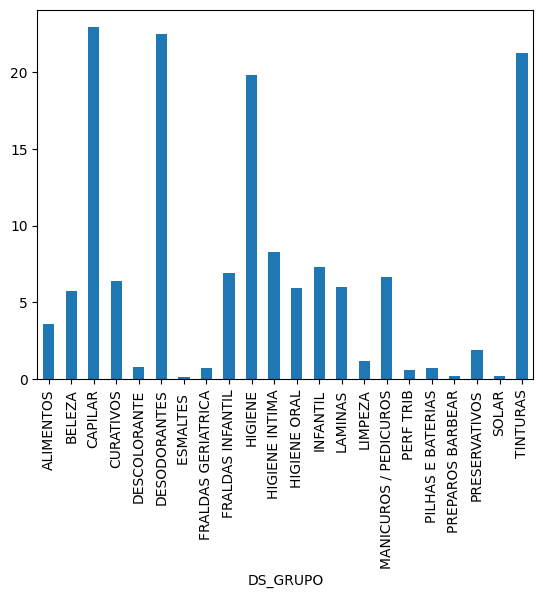

In [655]:
pivot_table_reset.drop(columns='id_cliente').mean().plot.bar()

In [656]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler

scaler = StandardScaler()
pivot_table_limpo = pivot_table_reset.drop(columns="id_cliente")

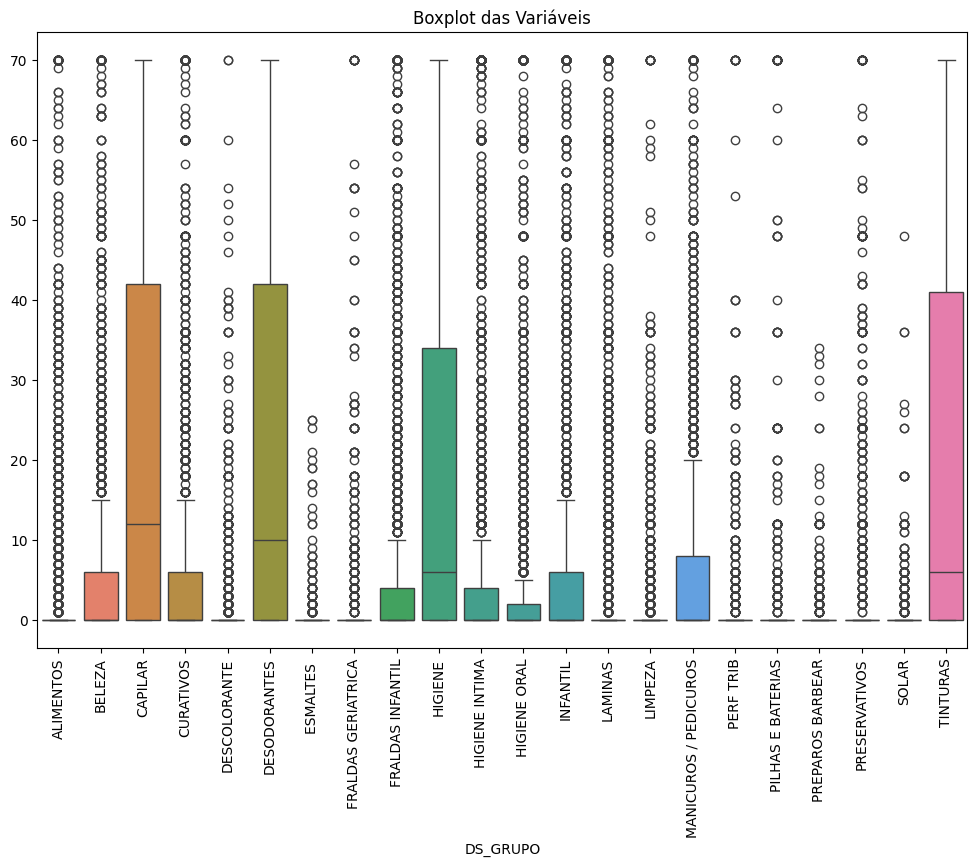

In [657]:
# Plotando boxplots para visualizar os outliers
plt.figure(figsize=(12, 8))
sns.boxplot(data=pivot_table_limpo)
plt.title('Boxplot das Variáveis')
plt.xticks(rotation=90)
plt.show()

array([[<Axes: title={'center': 'id_cliente'}>,
        <Axes: title={'center': 'ALIMENTOS'}>,
        <Axes: title={'center': 'BELEZA'}>,
        <Axes: title={'center': 'CAPILAR'}>,
        <Axes: title={'center': 'CURATIVOS'}>],
       [<Axes: title={'center': 'DESCOLORANTE'}>,
        <Axes: title={'center': 'DESODORANTES'}>,
        <Axes: title={'center': 'ESMALTES '}>,
        <Axes: title={'center': 'FRALDAS GERIATRICA'}>,
        <Axes: title={'center': 'FRALDAS INFANTIL'}>],
       [<Axes: title={'center': 'HIGIENE'}>,
        <Axes: title={'center': 'HIGIENE INTIMA'}>,
        <Axes: title={'center': 'HIGIENE ORAL'}>,
        <Axes: title={'center': 'INFANTIL'}>,
        <Axes: title={'center': 'LAMINAS'}>],
       [<Axes: title={'center': 'LIMPEZA'}>,
        <Axes: title={'center': 'MANICUROS / PEDICUROS'}>,
        <Axes: title={'center': 'PERF TRIB'}>,
        <Axes: title={'center': 'PILHAS E BATERIAS'}>,
        <Axes: title={'center': 'PREPAROS BARBEAR'}>],
       [<A

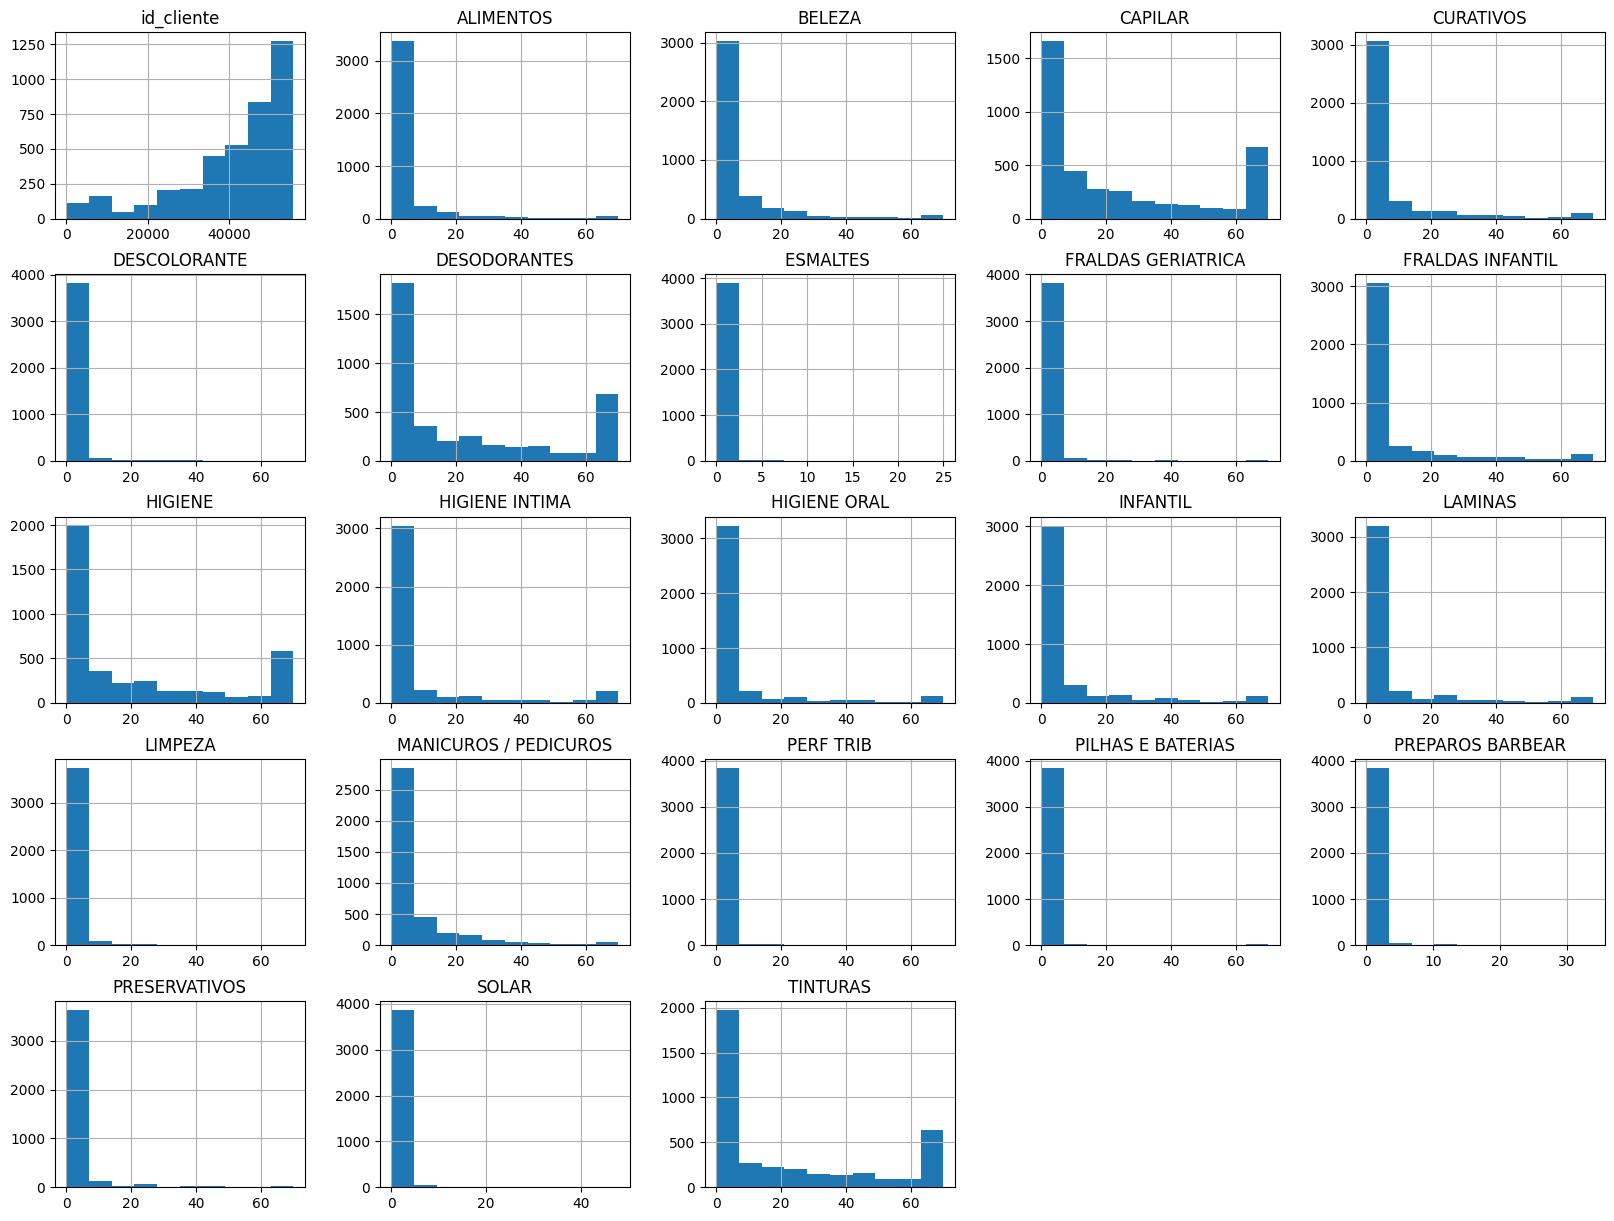

In [658]:
pivot_table_reset.hist(figsize=(20,15))


Visualização da matriz de correlação
Filtrando apenas as colunas com uma correlação relevante

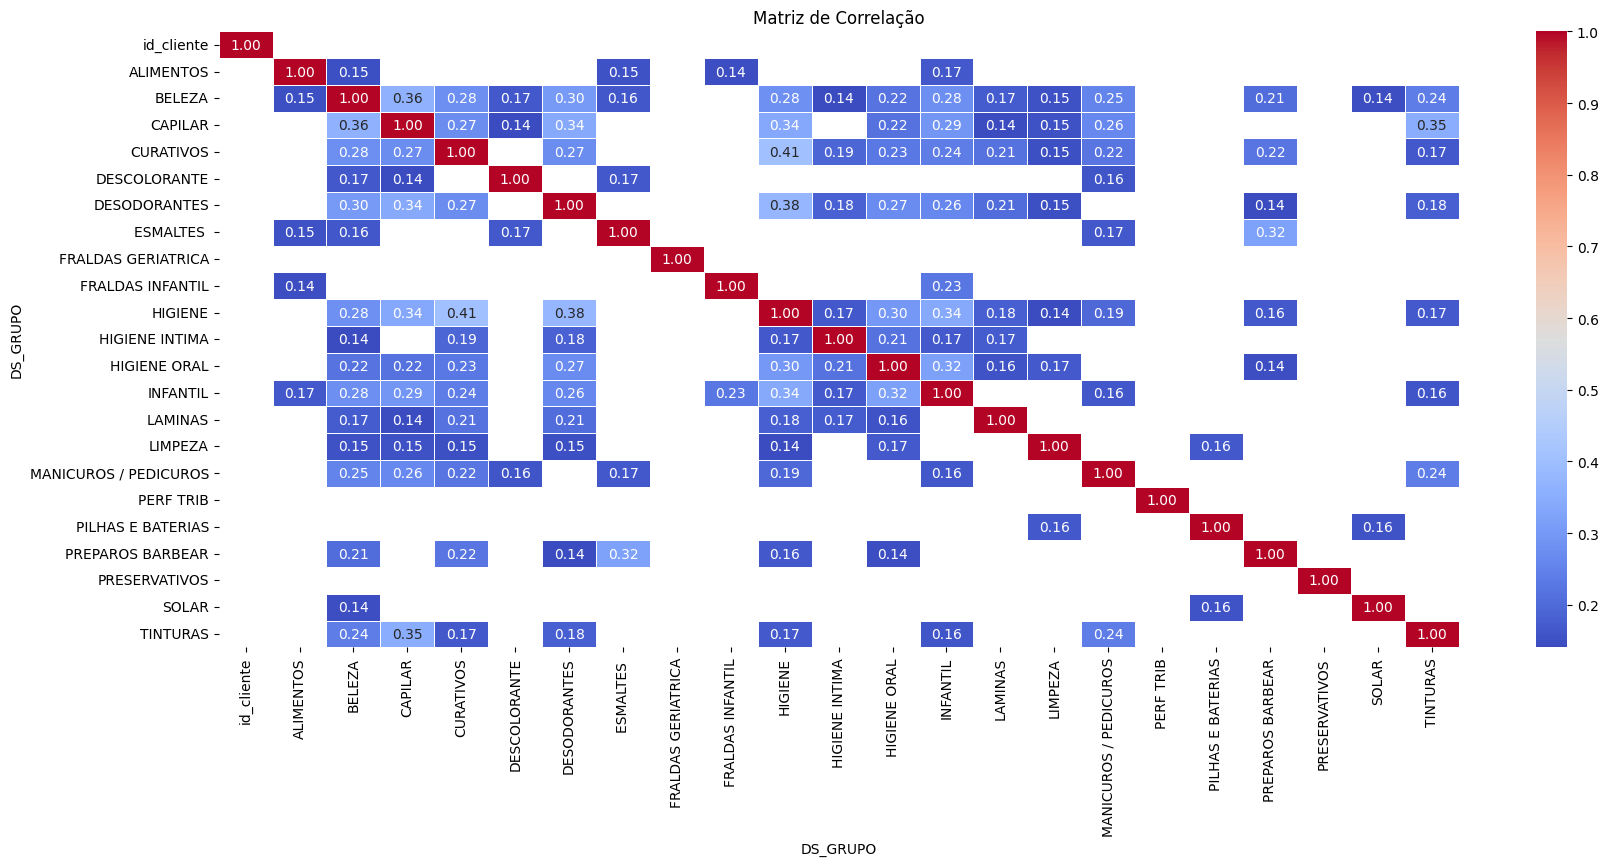

In [659]:
# Visualização da matriz de correlação

matriz_corr = pivot_table_reset.corr()

# Criando uma máscara para ocultar valores menores ou iguais a 0.30
mask = matriz_corr <= matriz_corr.mean().mean()

# Aplicando a máscara à matriz de correlação
matriz_corr_filtrada = matriz_corr.mask(mask)


plt.figure(figsize=(20, 8))
sns.heatmap(matriz_corr_filtrada, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
plt.title('Matriz de Correlação')
plt.show()


# Aplicando o PCA

In [660]:
from sklearn.decomposition import PCA


pca = PCA(n_components=1)
pivot_table_pca = pca.fit_transform(pivot_table_limpo)
d1 = pd.DataFrame(data=pivot_table_pca, columns=[1])
d1



,1
0,-8.369100
1,9.813298
2,170.545322
3,-38.288028
4,41.821726
...,...
3925,-44.019993
3926,-21.589160
3927,-28.837269
3928,47.578761


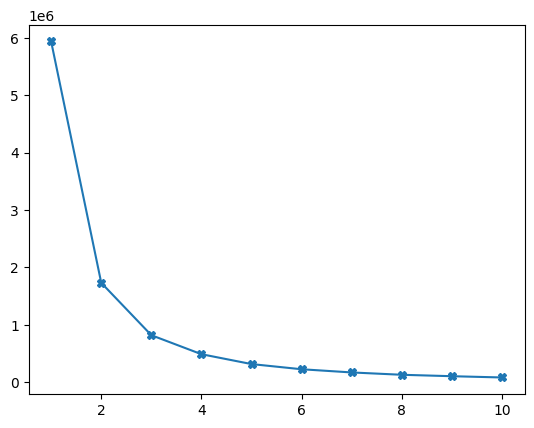

In [661]:
from sklearn.cluster import KMeans


inertia = []
for i in range(1,11):
    kmeans = KMeans(n_clusters=i, random_state=1234)
    kmeans.fit(pivot_table_pca)
    inertia.append((i,kmeans.inertia_,))

plt.plot([w[0] for w in inertia],[w[1] for w in inertia], marker="X")

In [662]:

# Aplicando o K-Means
kmeans = KMeans(n_clusters=3, random_state=42 ) #,init='k-means++', n_init=10)
kmeans.fit(pivot_table_pca)

# Adicionando os labels dos clusters ao DataFrame original
pivot_table_reset['Cluster'] = kmeans.labels_

# Analisando os centros dos clusters

cluster_centers_pca      = kmeans.cluster_centers_
cluster_centers_original = pca.inverse_transform(cluster_centers_pca)



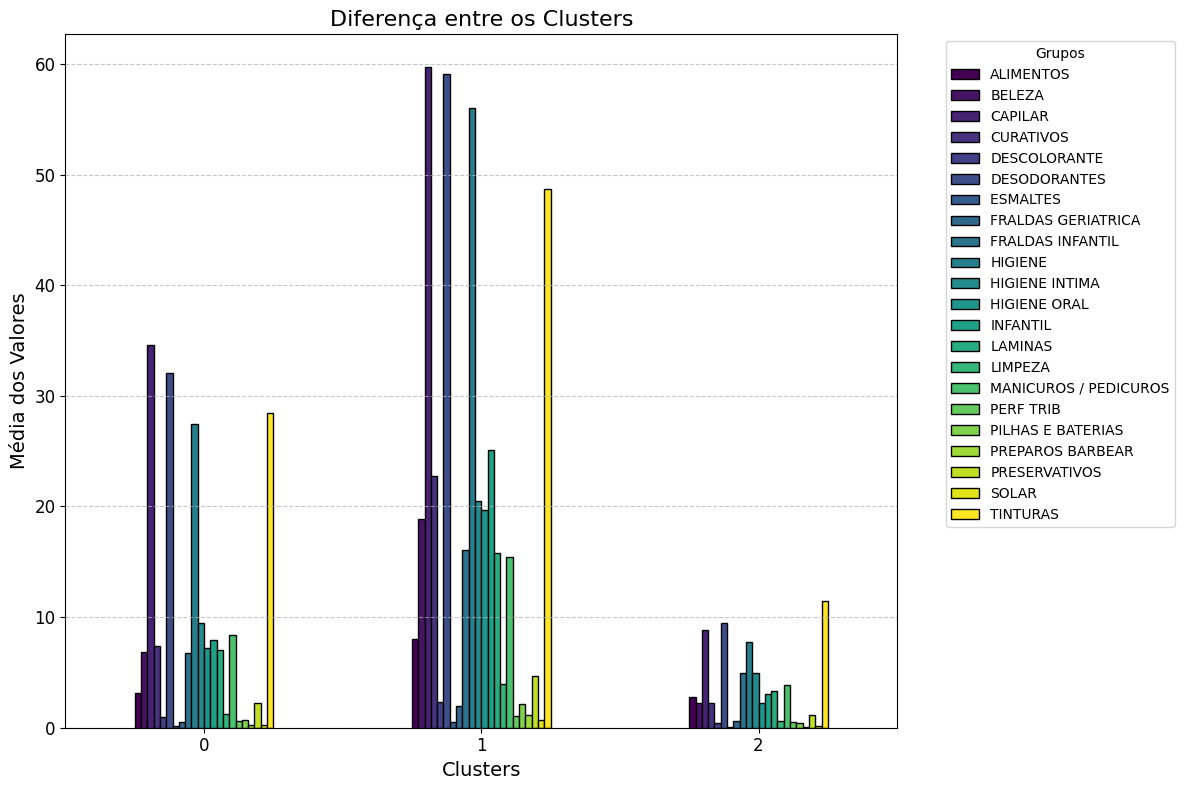

In [663]:
# Calculando a média dos grupos por cluster
cluster_means = pivot_table_reset.drop(columns='id_cliente').groupby('Cluster').mean()

# Plotando o gráfico de barras
ax = cluster_means.plot(kind='bar', figsize=(12, 8), colormap='viridis', edgecolor='black')

# Adicionando rótulos e título
plt.title('Diferença entre os Clusters', fontsize=16)
plt.xlabel('Clusters', fontsize=14)
plt.ylabel('Média dos Valores', fontsize=14)
plt.legend(title='Grupos', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=0, fontsize=12)
plt.yticks(fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Exibindo o gráfico
plt.tight_layout()
plt.show()

In [664]:
# Selecionando apenas duas colunas para o pair plot, além da coluna de cluster
#columns_to_plot = [5,6,7,10,12,15,21,22,10000, 'Cluster']
#subset_data = pivot_table[columns_to_plot]

# Criando o pair plot para as duas colunas selecionadas
#sns.pairplot(subset_data, hue='Cluster' , palette='viridis', diag_kind='hist', markers='o', height=4)
#plt.suptitle('Pair Plot das Variáveis com Clusters', fontsize=16)
#plt.show()

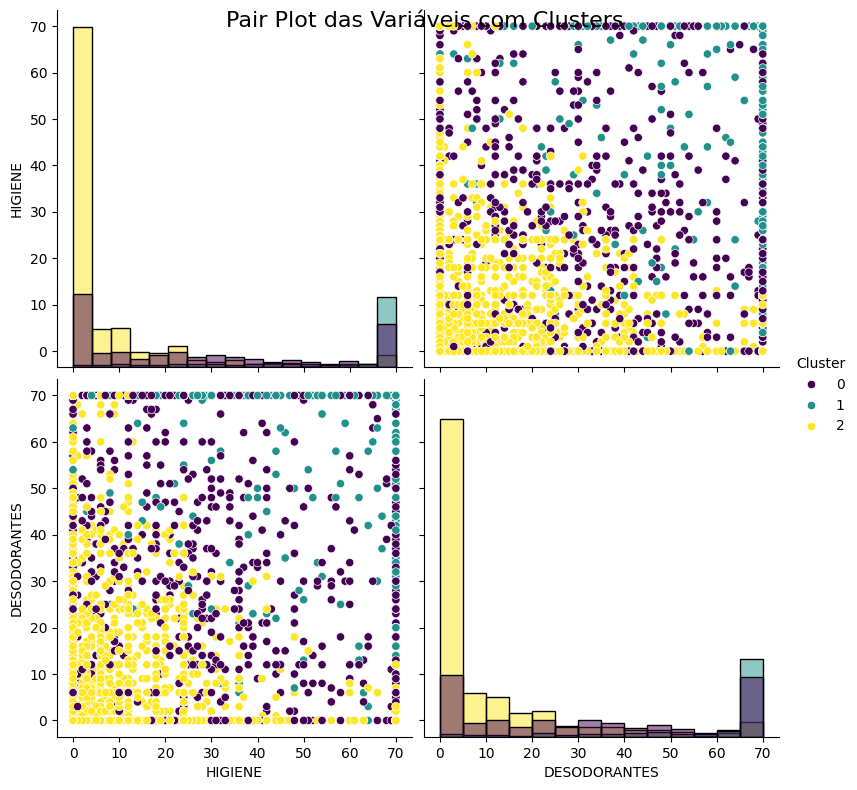

In [665]:
# Selecionando apenas duas colunas para o pair plot, além da coluna de cluster
columns_to_plot = ['HIGIENE','DESODORANTES','Cluster']
subset_data = pivot_table_reset[columns_to_plot]

# Criando o pair plot para as duas colunas selecionadas
sns.pairplot(subset_data, hue='Cluster' , palette='viridis', diag_kind='hist', markers='o', height=4)

plt.suptitle('Pair Plot das Variáveis com Clusters', fontsize=16)
plt.show()

In [666]:
dfCentros = pd.DataFrame(data=cluster_centers_original, columns=pivot_table_reset.drop(columns=['id_cliente','Cluster']).columns)
dfCentros

DS_GRUPO,ALIMENTOS,BELEZA,CAPILAR,CURATIVOS,DESCOLORANTE,DESODORANTES,ESMALTES,FRALDAS GERIATRICA,FRALDAS INFANTIL,HIGIENE,...,INFANTIL,LAMINAS,LIMPEZA,MANICUROS / PEDICUROS,PERF TRIB,PILHAS E BATERIAS,PREPAROS BARBEAR,PRESERVATIVOS,SOLAR,TINTURAS
0,4.359751,8.489223,31.446735,9.671332,1.160486,30.830805,0.204277,0.943744,8.578725,27.709078,...,10.750437,8.071931,1.761110,8.641036,0.681067,0.964696,0.405775,2.477524,0.337636,27.531442
1,7.092213,18.047296,61.313182,21.095632,2.329573,60.010221,0.477101,1.640827,14.446246,55.399573,...,22.684166,15.294020,3.696231,15.539075,0.959035,1.772350,1.009295,4.407759,0.673687,49.525399
2,2.386765,1.587774,9.881536,1.422365,0.316342,9.761679,0.007283,0.440412,4.342056,7.715035,...,2.133636,2.857189,0.363848,3.660277,0.480359,0.381526,-0.029999,1.083789,0.094989,11.650609


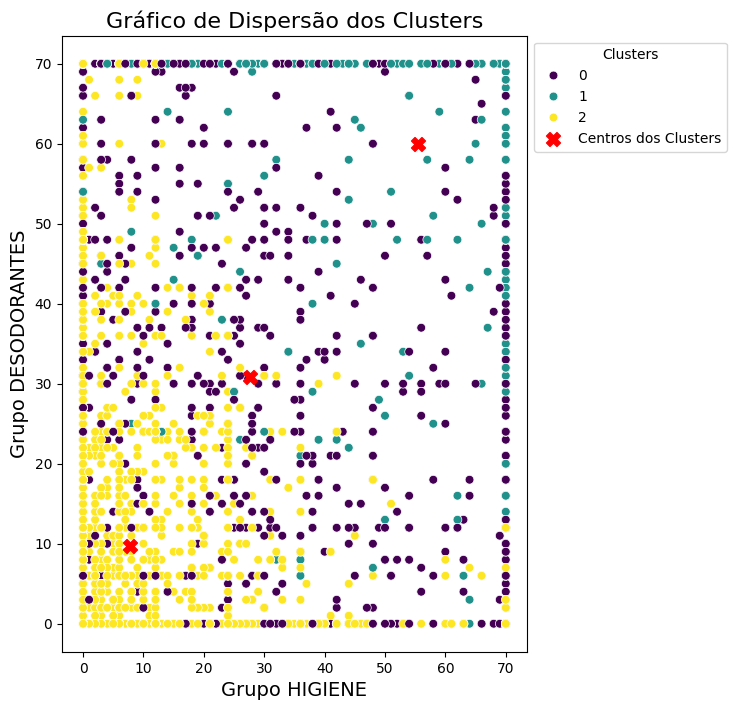

In [667]:
x = 'HIGIENE'
y = 'DESODORANTES'
# Criando o scatter plot com Seaborn
plt.figure(figsize=(6, 8))
scatter = sns.scatterplot(x=pivot_table_reset[x], y=pivot_table_reset[y], hue=pivot_table_reset['Cluster'], palette='viridis',  s=40)

# Adicionando os centros dos clusters
plt.scatter(dfCentros[x], dfCentros[y], color='red', marker='X', s=100, label='Centros dos Clusters')

# Adicionando rótulos e título
plt.title('Gráfico de Dispersão dos Clusters', fontsize=16)
plt.xlabel('Grupo ' + x, fontsize=14)
plt.ylabel('Grupo ' + y, fontsize=14)

# Adicionando a legenda para os centros dos clusters
plt.legend(title="Clusters")
plt.legend(title="Clusters", loc='upper left', bbox_to_anchor=(1, 1))


plt.grid(False)
plt.show()

In [668]:
pivot_table_reset['Cluster'].value_counts()

Cluster
2    2285
0    1128
1     517
Name: count, dtype: int64

In [671]:
def explicaCluster(dfCluster : pd.DataFrame,nomeCluster):
    # Visualização da matriz de correlação
    print(dfCluster['Cluster'].value_counts())
    matriz_corr = dfCluster.corr()

    # Criando uma máscara para ocultar valores menores ou iguais a 0.30
    mask = matriz_corr <= matriz_corr.corr().mean().median()

    # Aplicando a máscara à matriz de correlação
    matriz_corr_filtrada = matriz_corr.mask(mask)


    plt.figure(figsize=(20, 8))
    sns.heatmap(matriz_corr_filtrada, cmap='coolwarm', annot=True, fmt=".2f", linewidths=.5)
    plt.title('Matriz de Correlação do Cluster :' + nomeCluster)
    plt.xticks(fontsize=8)
    plt.yticks(fontsize=8)
    plt.show()

    # Calculando a média dos grupos por cluster
    cluster_means = dfCluster.mean()

    # Plotando o gráfico de barras
    ax = cluster_means.plot(kind='bar', figsize=(20, 8), colormap='viridis', edgecolor='black')

    # Adicionando rótulos e título
    plt.title('Media de quantidade Vendida no Cluster ' + nomeCluster, fontsize=10)
    plt.xlabel('Grupos', fontsize=10)
    plt.ylabel('Média de Quantidade Vendida', fontsize=10)
    plt.xticks(rotation=90, fontsize=12)
    plt.yticks(fontsize=12)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Exibindo o gráfico
    plt.tight_layout()
    plt.show()

Cluster
0    1128
Name: count, dtype: int64


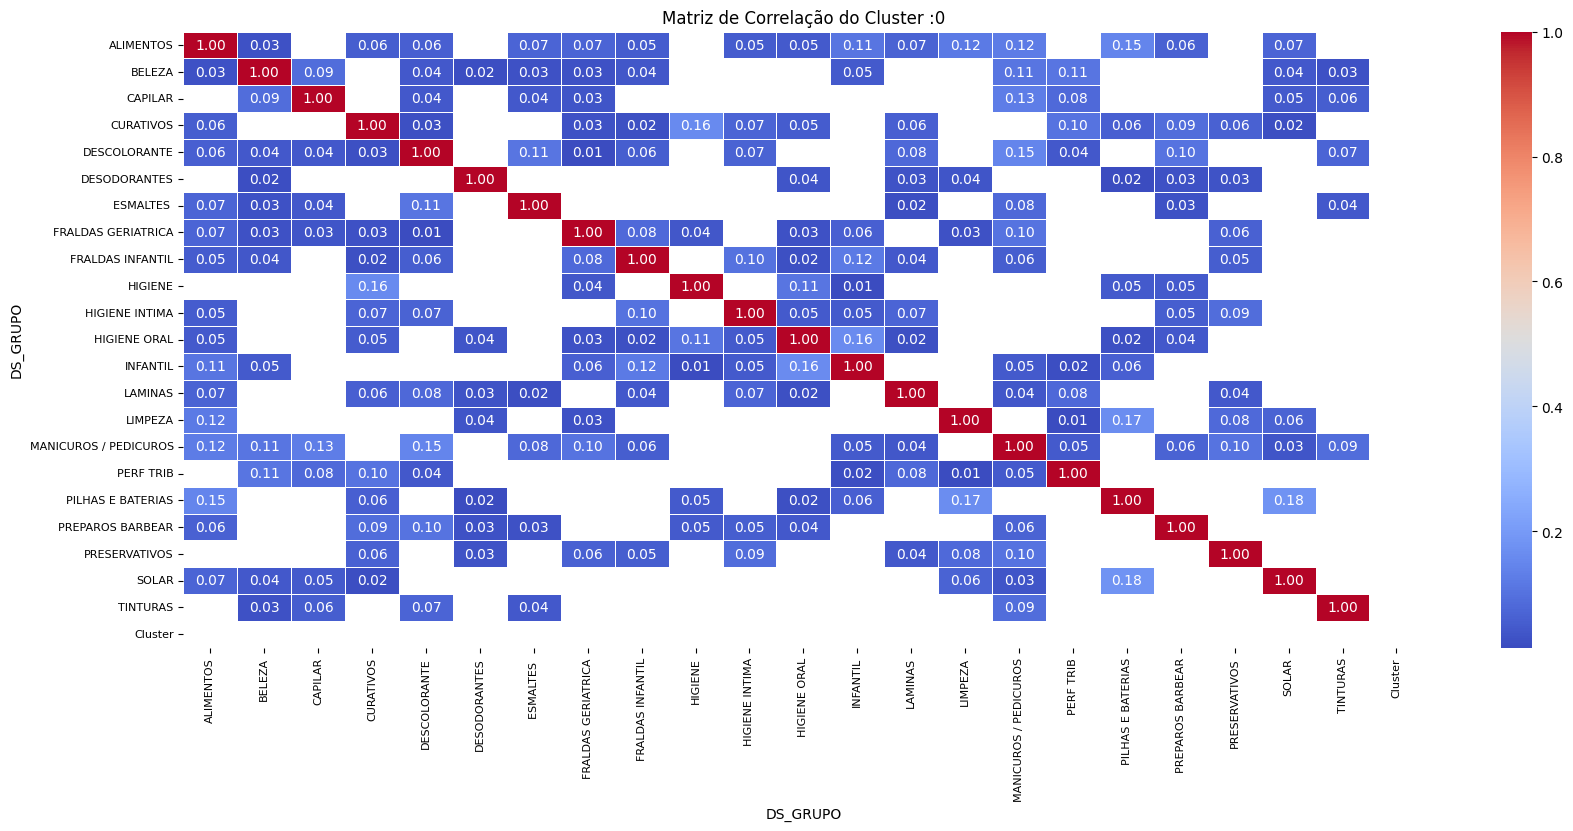

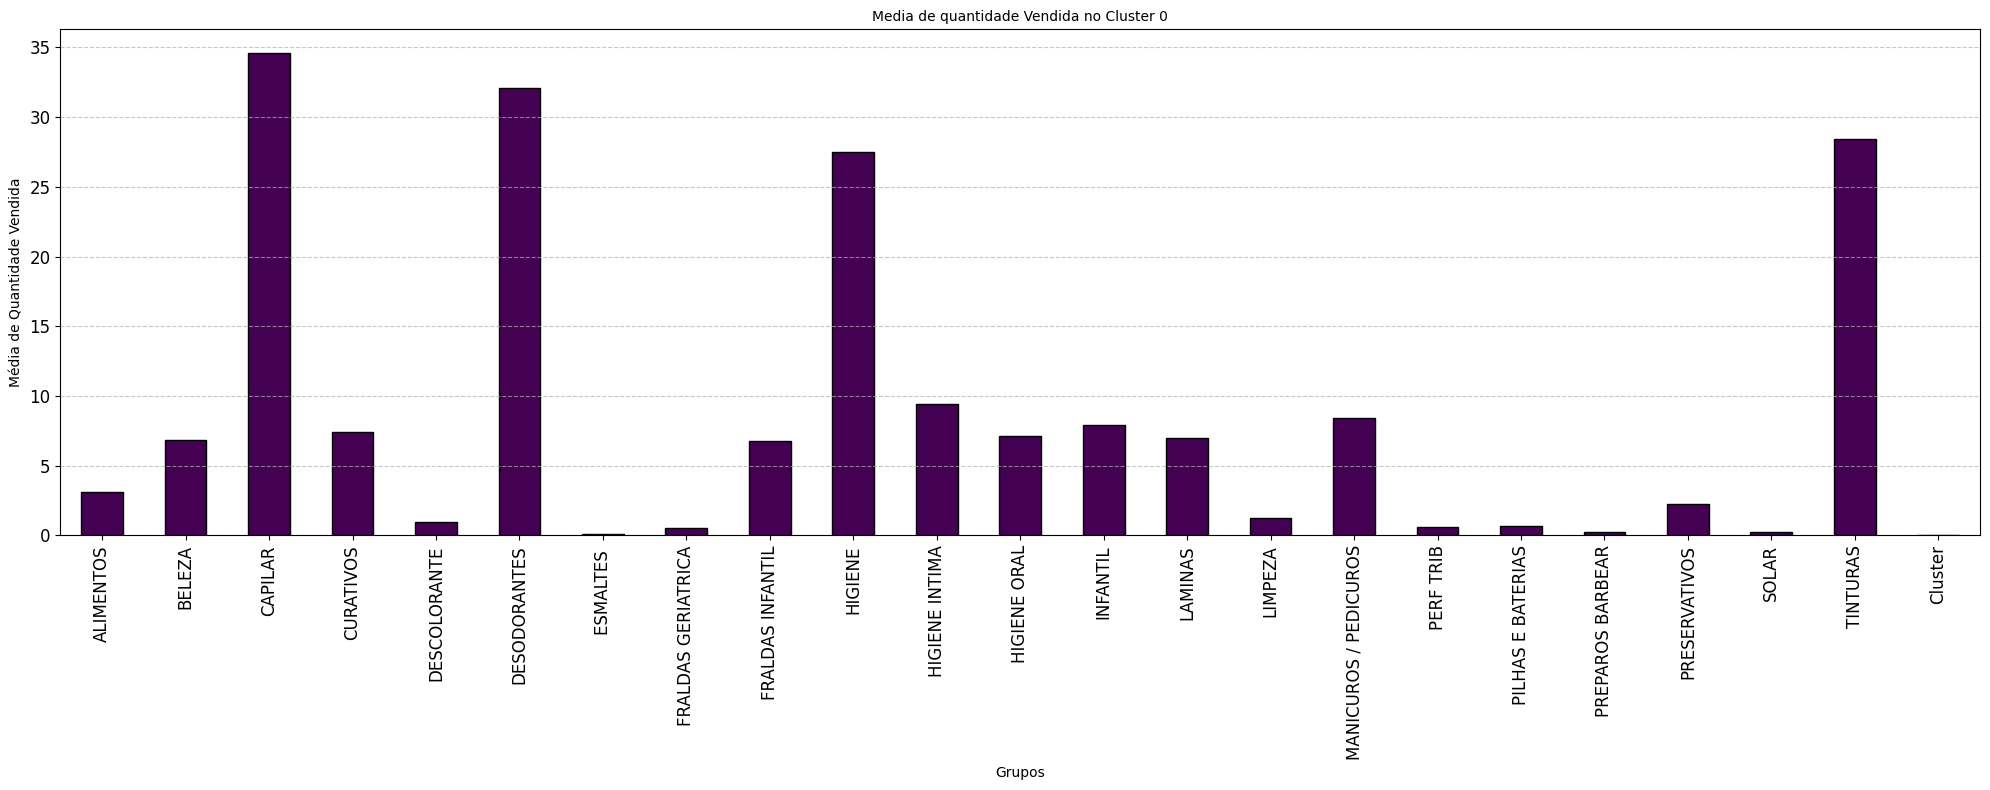

Cluster
1    517
Name: count, dtype: int64


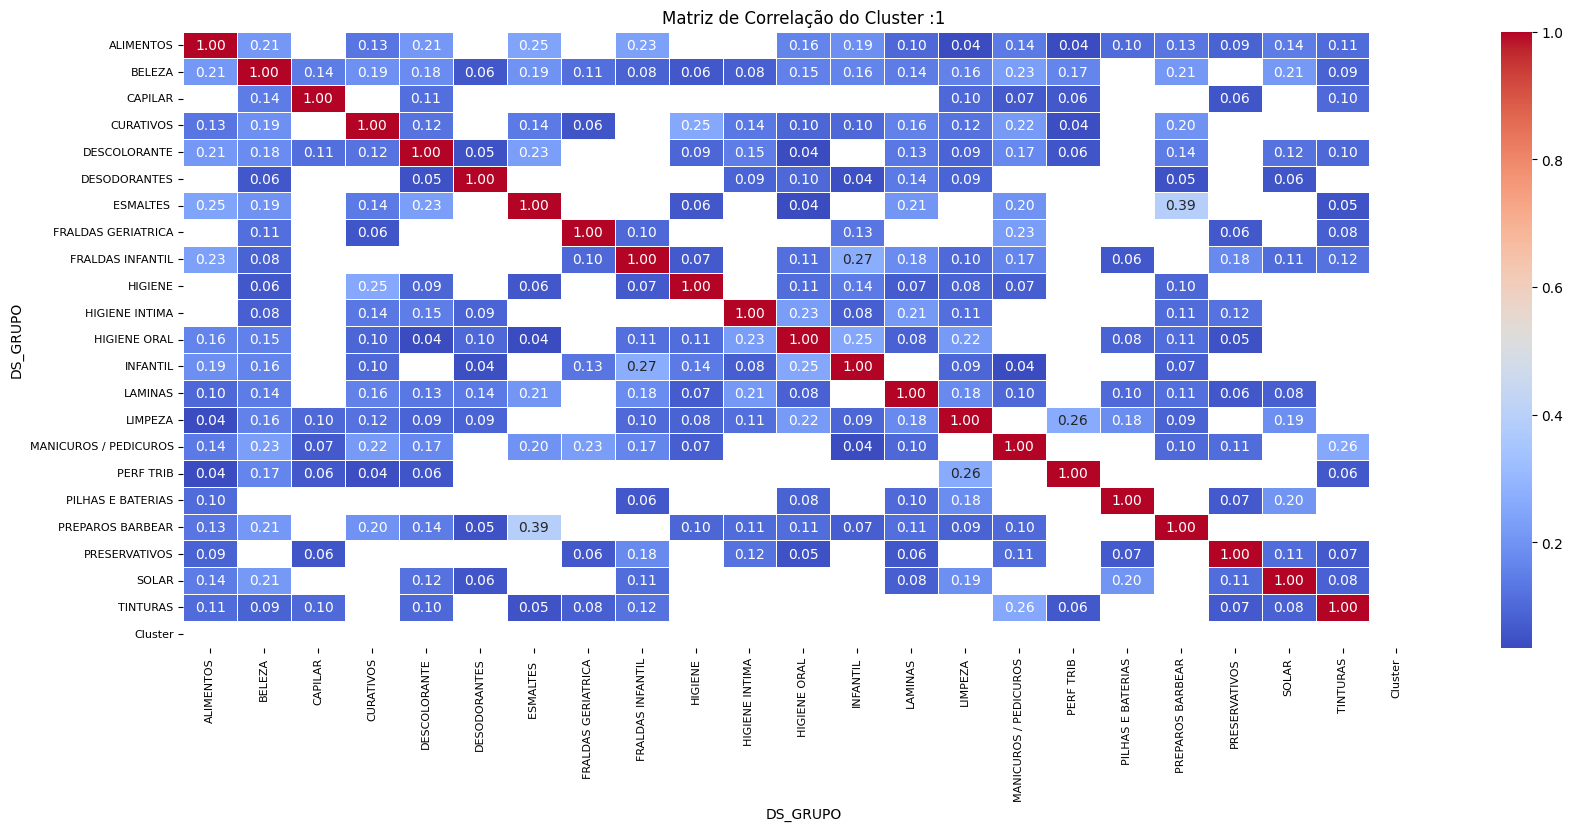

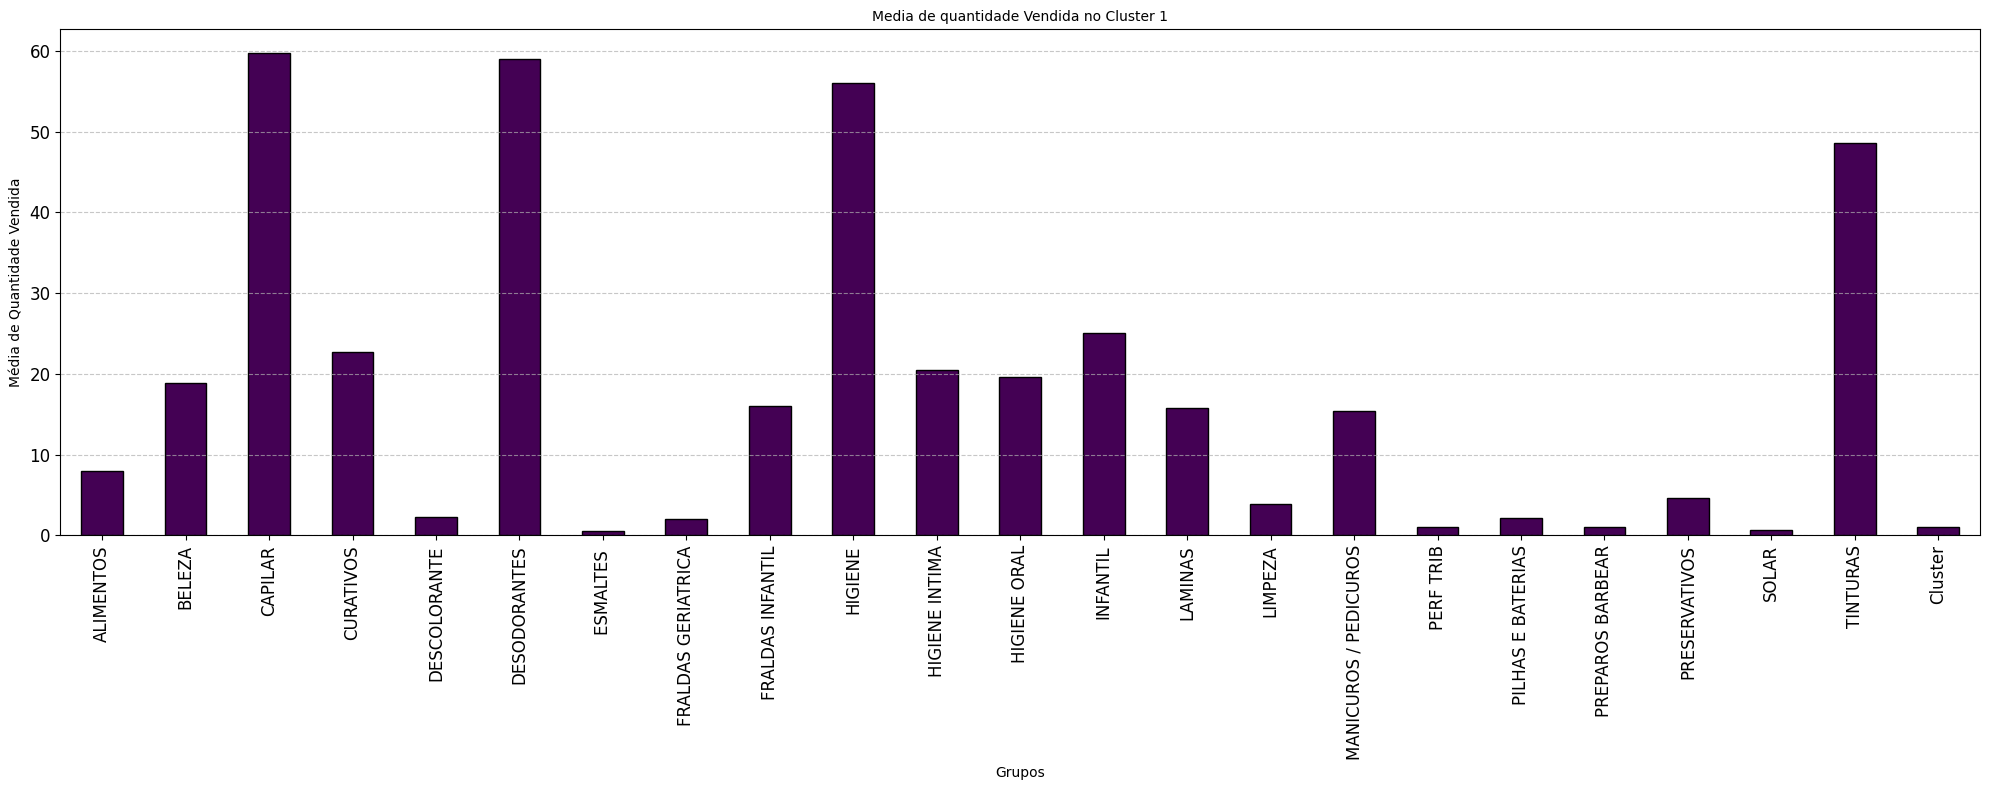

Cluster
2    2285
Name: count, dtype: int64


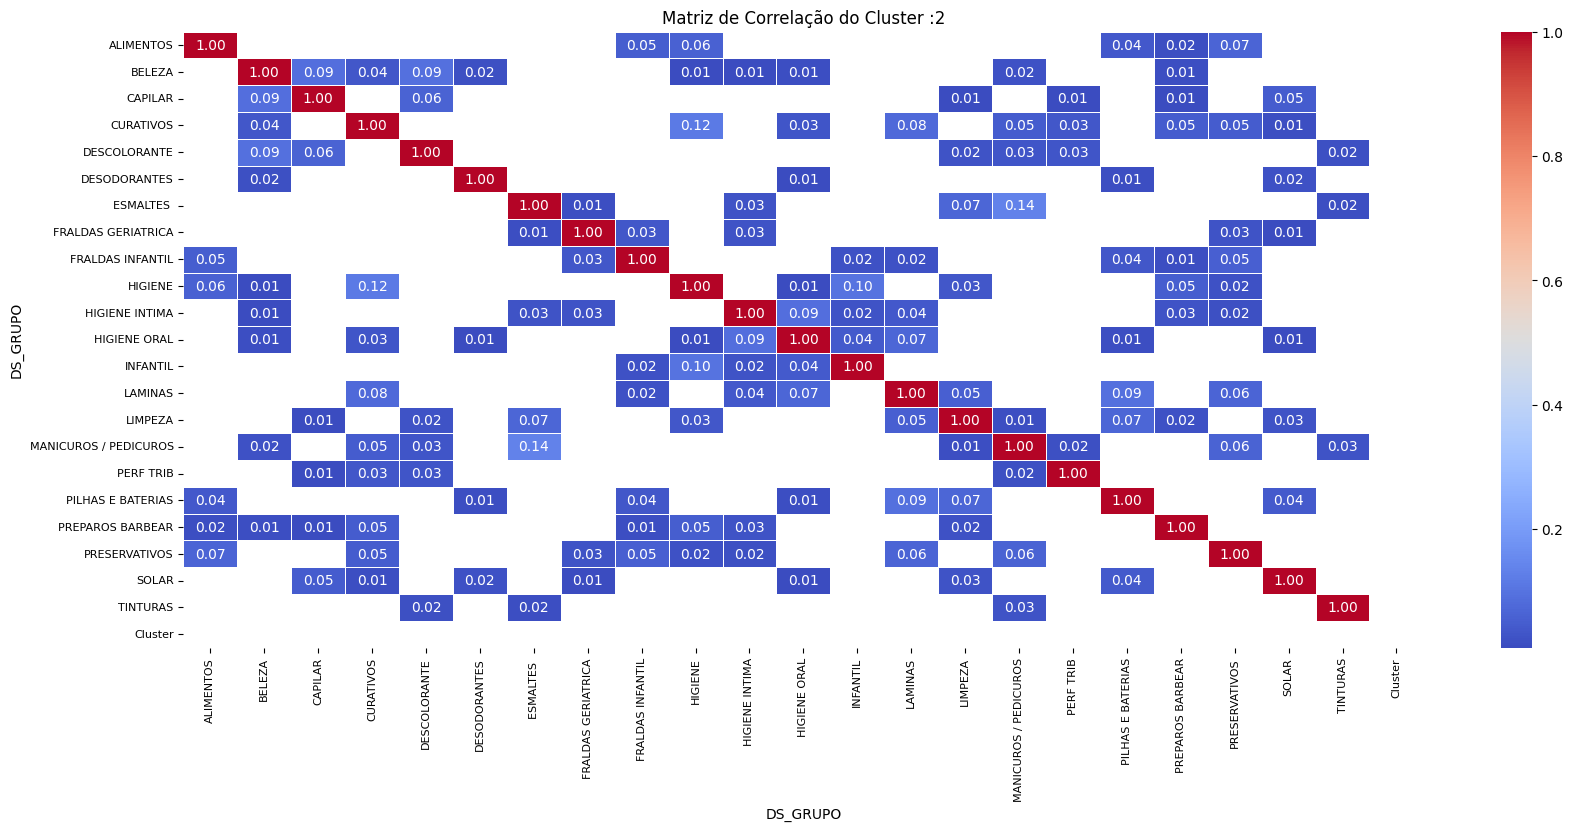

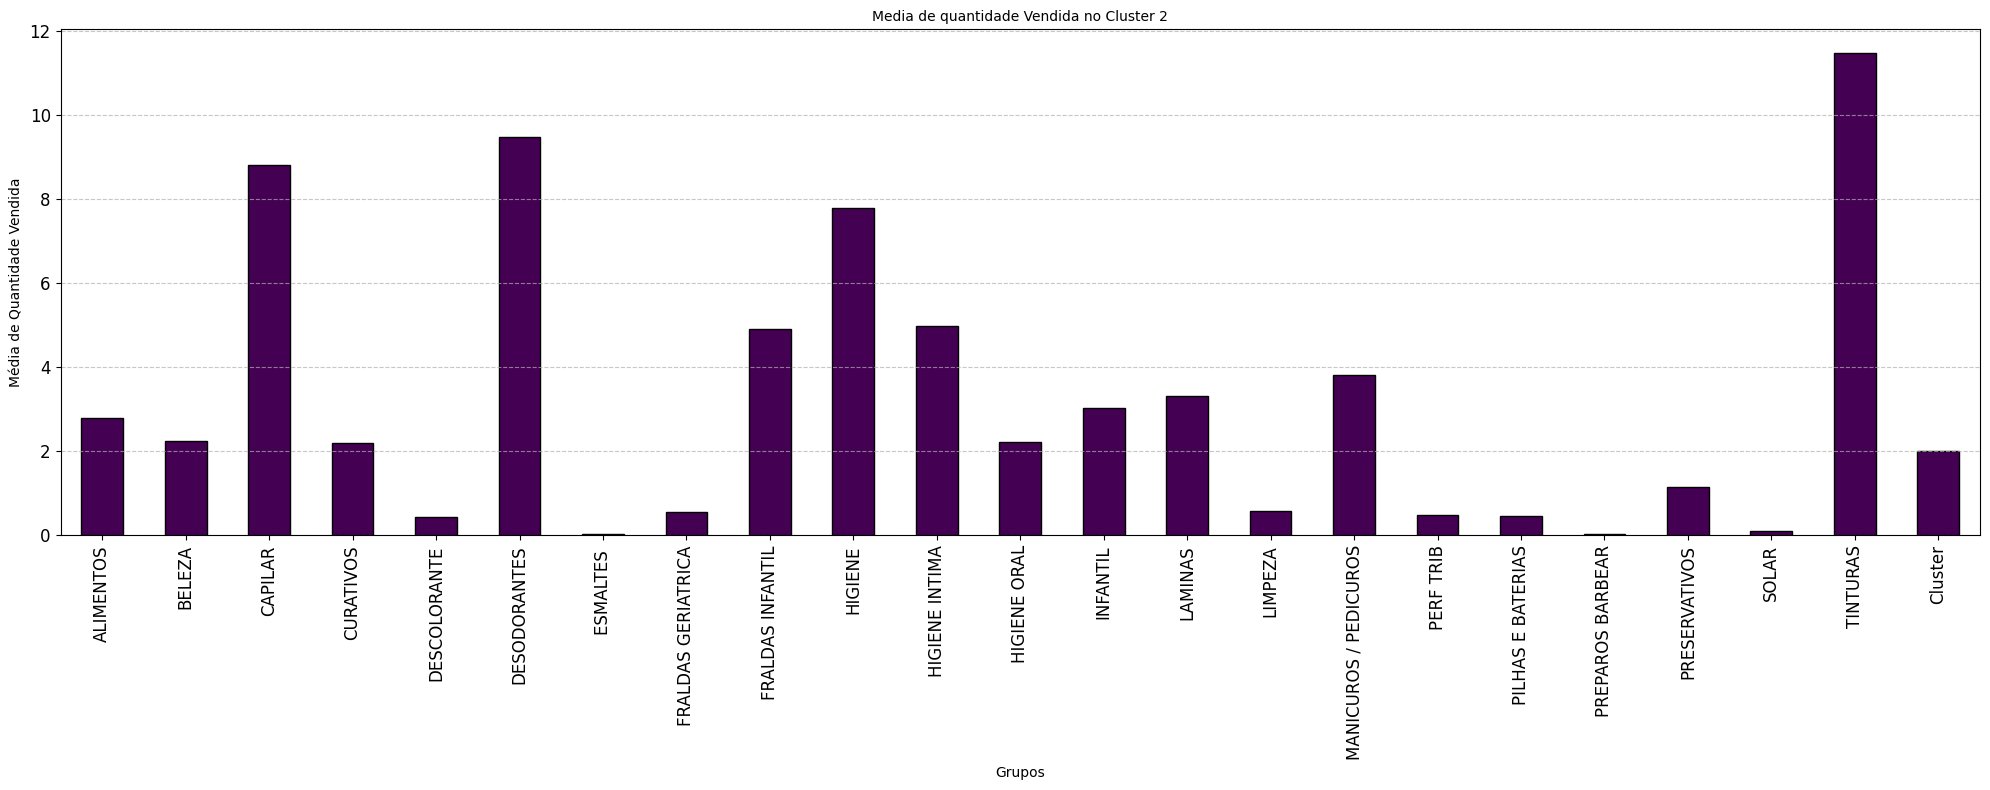

In [672]:
for cluster_id, cluster_data in pivot_table_reset.drop(columns='id_cliente').groupby('Cluster'):
    explicaCluster(cluster_data, str(cluster_id))